<a href="https://colab.research.google.com/github/jirayuwat12/SuperAI/blob/master/MNIST_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#MNIST data set

In [1]:
from matplotlib import pyplot as plt
from tensorflow.keras.datasets import mnist
plt.gray()

<Figure size 432x288 with 0 Axes>

In [2]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
x_train.shape, y_train.shape

((60000, 28, 28), (60000,))

In [4]:
x_train = x_train[:3000]
y_train = y_train[:3000]
x_test = x_test[:300]
y_test = y_test[:300]

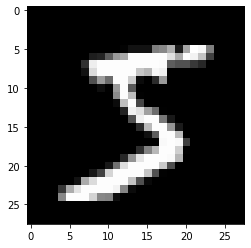

In [5]:
plt.imshow(x_train[0])

# reshape to vector then classify

In [6]:
x_train_vec = x_train.reshape(x_train.shape[0],-1)
x_test_vec = x_test.reshape(x_test.shape[0],-1)
x_train_vec.shape, x_test_vec.shape

((3000, 784), (300, 784))

In [7]:
from sklearn.ensemble import RandomForestClassifier

In [8]:
model = RandomForestClassifier()
model.fit(x_train_vec,y_train)

RandomForestClassifier()

In [9]:
pred = model.predict(x_test_vec)

In [10]:
(pred == y_test).sum() / len(y_test)

0.9366666666666666

# image traditional feature extraction

In [17]:
from skimage import feature
import numpy as np

## local binary pattern

In [12]:
radius = 2
n_point = 16*radius

In [13]:
lbp = feature.local_binary_pattern(x_train[0],n_point,radius,'uniform')

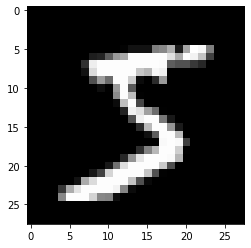

In [14]:
plt.imshow(x_train[0])

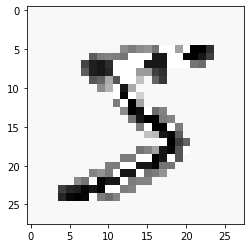

In [15]:
plt.imshow(lbp)

In [21]:
lbp = np.histogram(lbp.ravel(),bins = n_point+1)[0]
lbp.shape

(33,)

In [22]:
def get_lbp_feature(img):
    lbp = feature.local_binary_pattern(img,n_point,radius,'uniform')
    return np.histogram(lbp.ravel(),bins=n_point+1)[0]

In [23]:
x_train_lbp = np.array([get_lbp_feature(x) for x in x_train])
x_test_lbp = np.array([get_lbp_feature(x) for x in x_test])


In [24]:
x_train_lbp.shape

(3000, 33)

In [26]:
model = RandomForestClassifier()
model.fit(x_train_lbp,y_train)
pred = model.predict(x_test_lbp)
(pred==y_test).sum()/len(y_test)

0.49333333333333335